In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

sns.set_context("talk")
sns.set_style("white")

%matplotlib inline

## Load the Data

In [2]:
output_dir = "./output/"
df = pd.read_csv("./data/1-cat.csv")
df.head()

,year,count,count_domain,category
0,2019,1124,182430,Materials Science
1,2018,464,165938,Materials Science
2,2017,235,162121,Materials Science
3,2016,119,147722,Materials Science
4,2015,109,140425,Materials Science


# Calculate relevant stats on the dataframe

In [3]:
def growth(x):
    return  (x[-1]-x[0]) / x[0]
    
def cagr(x):
    return  (x[-1] / x[0]) ** (1 / (len(x) - 1)) - 1

        
def calculate_stats(group):
    group['yoy_1'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(2,2).apply(growth, raw=True)
    group['yoy_2'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(3,2).apply(growth, raw=True)
    group['yoy_5'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(6,2).apply(growth, raw=True)
    group['cagr_1'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(2,2).apply(cagr, raw=True)*100
    group['cagr_2'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(3,2).apply(cagr, raw=True)*100
    group['cagr_5'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(6,2).apply(cagr, raw=True)*100
    return group

df['normalized'] = 100*df['count']/df['count_domain']
df = df.groupby('category').apply(calculate_stats)

# Show Latest Stats

cagr - Compound Annual Growth Rate (%)

yoy_n - current count / count n years ago

In [4]:
df[df.year==2019]

,year,count,count_domain,category,normalized,yoy_1,yoy_2,yoy_5,cagr_1,cagr_2,cagr_5
0,2019,1124,182430,Materials Science,0.616127,1.422414,3.782979,17.129032,142.241379,118.700222,78.515086
20,2019,2674,259914,Chemistry,1.028802,0.393434,1.000000,1.756701,39.343408,41.421356,22.483598
40,2019,1386,151779,Physics,0.913170,0.865410,2.696000,13.903226,86.541050,92.249837,71.654841
60,2019,8582,89635,Computer Science,9.574385,0.601119,1.599818,4.898282,60.111940,61.239519,42.608399
80,2019,734,80198,Biochemistry & Molecular Biology,0.915235,1.258462,2.744898,5.016393,125.846154,93.517388,43.175018
100,2019,8079,308226,Engineering,2.621129,0.749080,2.446672,9.411082,74.907989,85.652157,59.771450


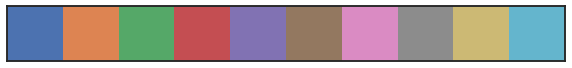

In [25]:
# Set plot time range
years = (2000, 2018)

# Set some marker defaults
marker_size = 150
marker_alpha = 0.6

# Set figure save parameters
fig_dpi = 1000

# Define plot sizes
golden = (4*1.618,4)

# Define palette options
colors = ["blue","orange","green"]*3
sns.set_palette("deep")
sns.palplot(sns.color_palette())

In [26]:
colors

['blue',
 'orange',
 'green',
 'blue',
 'orange',
 'green',
 'blue',
 'orange',
 'green']

# Visualize with MatplotLib

## All Together

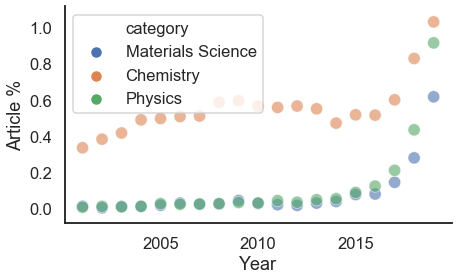

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)

category_list = ["Materials Science", "Chemistry", "Physics"]

df = df[df['category'].isin(category_list)]
data = df[df['year']>years[0]]
sns.scatterplot(x="year", y="normalized",
                hue="category", data=data, 
                s=marker_size, alpha=marker_alpha,
                ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article %")
sns.despine()
plt.tight_layout()

fig.savefig(os.path.join(output_dir,'1-all-scatter-norm.png'),
            dpi=fig_dpi)

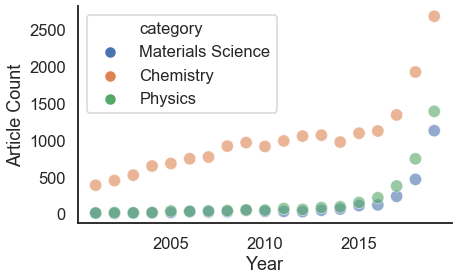

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.scatterplot(x="year", y="count",
                hue="category", data=data, 
                s=marker_size, alpha=marker_alpha,
                ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article Count")
sns.despine()
plt.tight_layout()

fig.savefig(os.path.join(output_dir,'1-all-scatter.png'),
            dpi=fig_dpi)

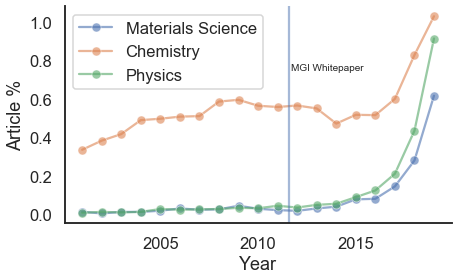

In [9]:
add_events = True

fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.lineplot(x="year", 
             y="normalized",
             hue="category", 
             data=data,
             marker='o',
             alpha=marker_alpha,
             ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article %")
sns.despine()
plt.tight_layout() 

if add_events:
    plt.axvline(x=2011.58, alpha=0.5) # June 24, 2011, Holdren OSP memo 
    plt.text(2011.7, 0.75, 'MGI Whitepaper')
plt.legend(title='', loc='upper left', labels=["Materials Science", "Chemistry","Physics"])
#     plt.axvline(x=2015.83, alpha=0.5) # June 24, 2011, Holdren OSP memo 
#     plt.text(2012.5, 0.75, 'MDF Funded')

fig.savefig(os.path.join(output_dir,'1-all-line-norm.png'),dpi=fig_dpi)

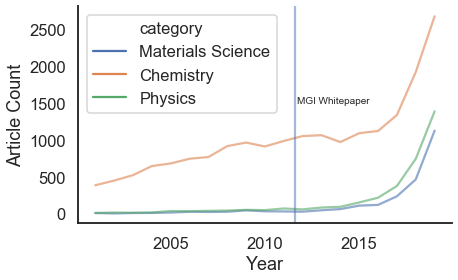

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.lineplot(x="year", y="count",
                  hue="category", data=data,
                  alpha=marker_alpha,
                 ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article Count")
sns.despine()
plt.tight_layout()

plt.axvline(x=2011.58, alpha=0.5) # June 24, 2011, Holdren OSP memo 
plt.text(2011.7, 1500, 'MGI Whitepaper')

fig.savefig(os.path.join(output_dir,'1-all-line.png'),dpi=fig_dpi)

## Grid

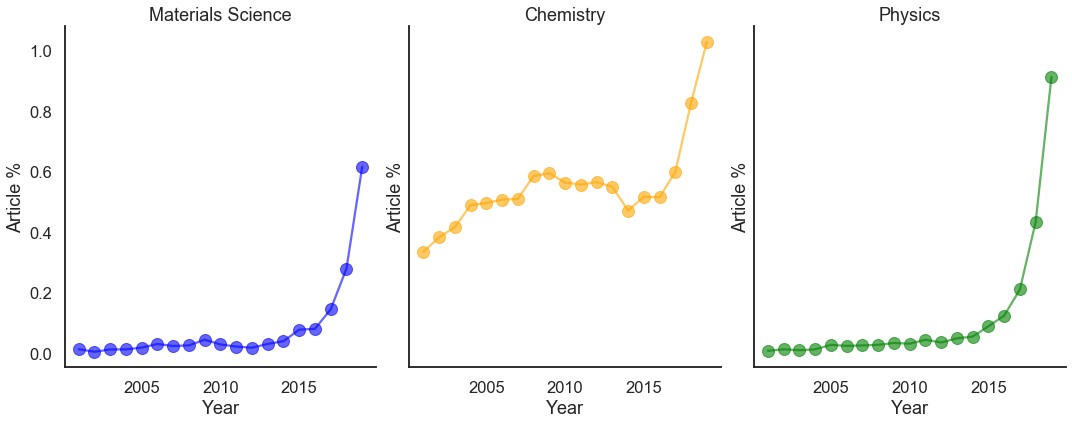

In [12]:
# Initialize a grid of plots with an Axes for each walk
categories = df['category'].unique()
f, axs = plt.subplots(1,len(categories), sharey=True, figsize=(15,6))

for i, cat in enumerate(categories):
    data = df[(df['category']==cat) & (df['year']>years[0])]
    axs[i].plot(data['year'], data['normalized'], 
                marker="o", markersize=12, color=colors[i], 
                alpha=marker_alpha) #c=colors[i], alpha=marker_alpha, s=marker_size)
    axs[i].set_title(cat)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Article %")
    sns.despine()
    plt.tight_layout()
f.savefig(os.path.join(output_dir,'1-grid-line-norm.png'),dpi=fig_dpi)

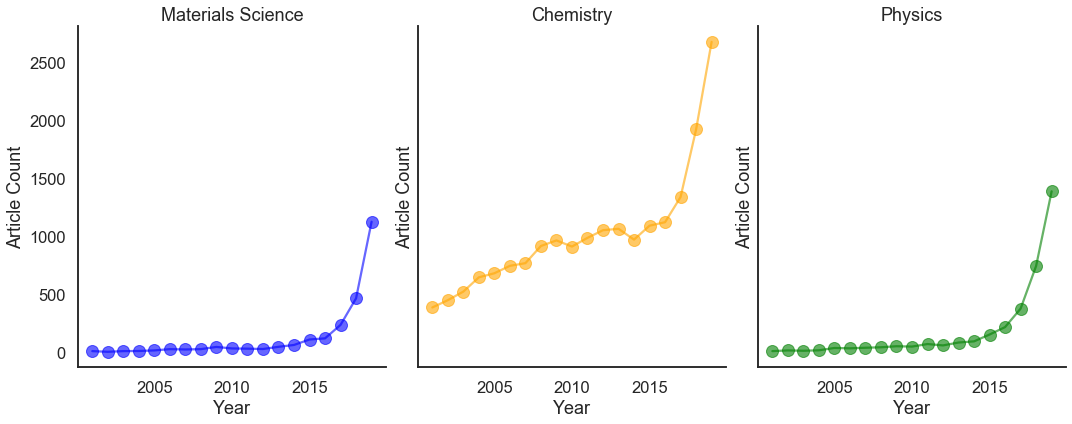

In [13]:
# Initialize a grid of plots with an Axes for each walk
categories = df['category'].unique()
f, axs = plt.subplots(1,len(categories), sharey=True, figsize=(15,6))

for i, cat in enumerate(categories):
    data = df[(df['category']==cat) & (df['year']>years[0])]
    axs[i].plot(data['year'], data['count'], 
                marker="o", markersize=12, color=colors[i], 
                alpha=marker_alpha) #c=colors[i], alpha=marker_alpha, s=marker_size)
    axs[i].set_title(cat)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Article Count")
    sns.despine()
    plt.tight_layout()
f.savefig(os.path.join(output_dir,'1-grid-line.png'),dpi=fig_dpi)

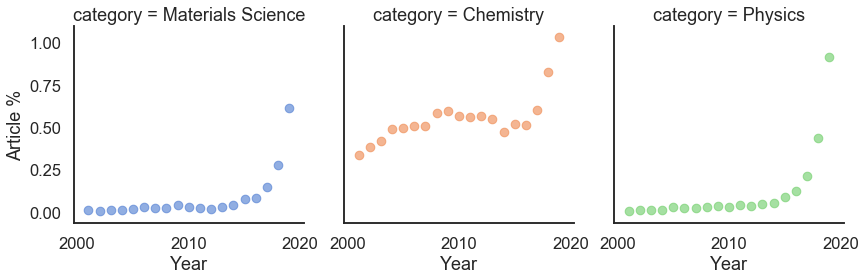

In [14]:
data = df[df['year']>years[0]]
sns_fig = sns.lmplot(x="year", y="normalized", col="category", 
           hue="category", data=data,
           col_wrap=3, ci=None, palette="muted", height=4, fit_reg=False,
           scatter_kws={"s": marker_size/2, "alpha": marker_alpha})
sns_fig.set_axis_labels("Year","Article %")
sns_fig.savefig(os.path.join(output_dir,"1-grid-norm.png"), dpi=fig_dpi)

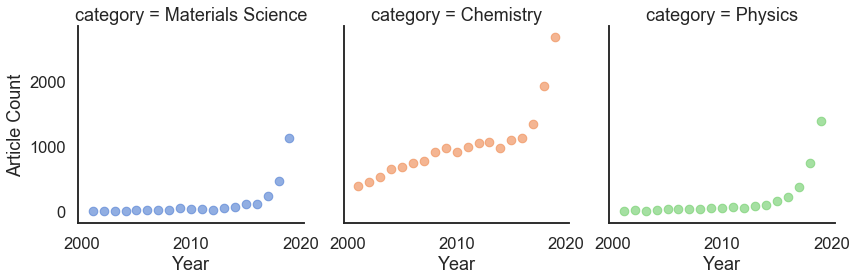

In [15]:
data = df[df['year']>years[0]]
sns_fig = sns.lmplot(x="year", y="count", col="category", 
           hue="category", data=data,
           col_wrap=3, ci=None, palette="muted", height=4, fit_reg=False,
           scatter_kws={"s": marker_size/2, "alpha": marker_alpha})
sns_fig.set_axis_labels("Year","Article Count")
sns_fig.savefig(os.path.join(output_dir,"1-grid.png"), dpi=fig_dpi)

# Individual

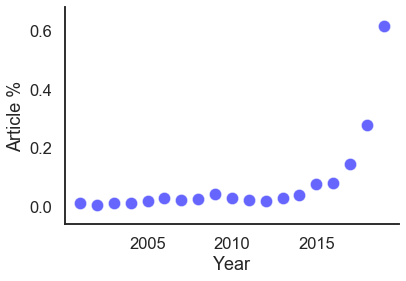

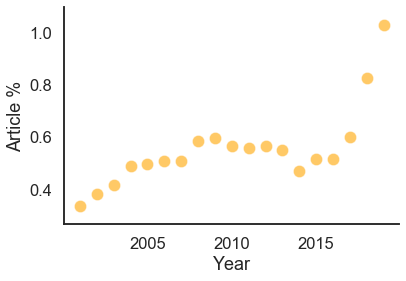

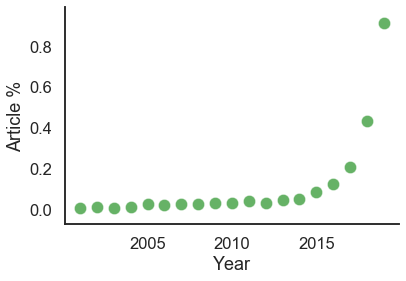

In [16]:
for i,category in enumerate(df['category'].unique()):
    fig = plt.figure()

    data = df[(df['category']==category) & (df['year']>years[0])]
    ax = sns.scatterplot(x="year", y="normalized",
                        data=data, s=marker_size, 
                        alpha=marker_alpha, color=colors[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Article %")
    sns.despine()
    fig.savefig(os.path.join(output_dir,'1-{}-norm.png'.format(category)),dpi=fig_dpi)

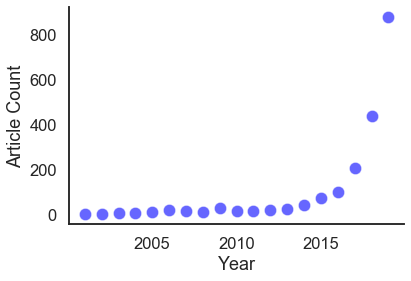

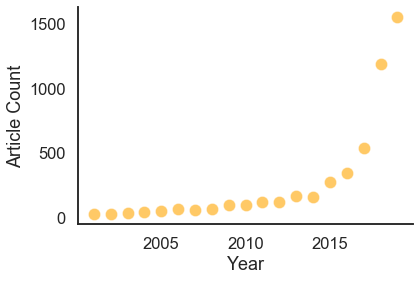

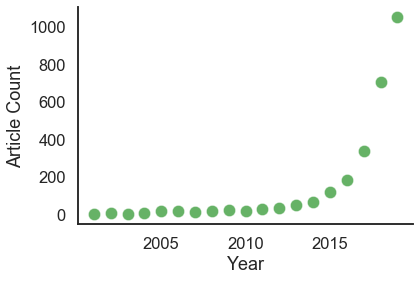

In [13]:
for i,category in enumerate(df['category'].unique()):
    fig = plt.figure()

    data = df[(df['category']==category) & (df['year']>years[0])]
    ax = sns.scatterplot(x="year", y="count",
                        data=data, s=marker_size, 
                        alpha=marker_alpha, color=colors[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Article Count")
    sns.despine()
    fig.savefig(os.path.join(output_dir,'1-{}.png'.format(category)),dpi=fig_dpi)

# Visualize with Altair

## All Together

In [14]:
data = df[df['category']=='Chemistry']

charts = []

for i, category in enumerate(df['category'].unique()):
    data = df[df['category']==category]
    chart = alt.Chart(data[['year','count']]).mark_circle(size=marker_size, color=colors[i]).encode(
        x=alt.X('year', scale=alt.Scale(domain=(2000, 2019))),
        y=alt.Y('count')).properties(
        width=500,
        height=350,
        title=category
    )
    charts.append(chart)

## All Together

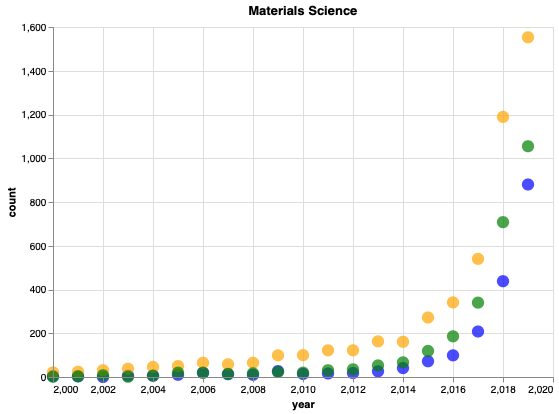

In [15]:
charts[0] + charts[1] + charts[2]

## Grid

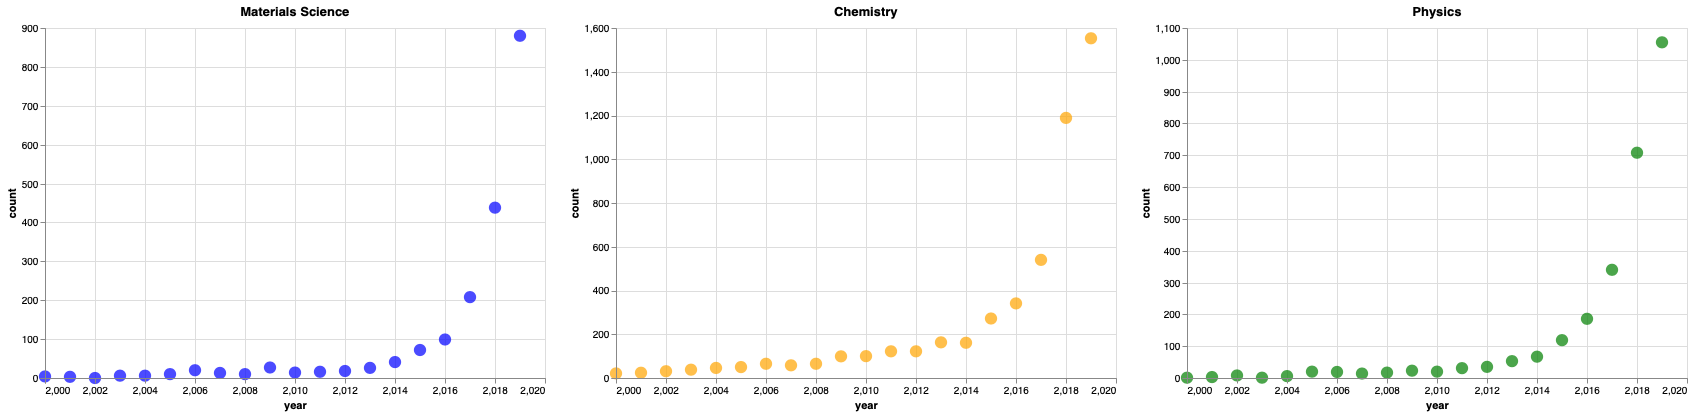

In [16]:
charts[0] | charts[1] | charts[2]

## Individual

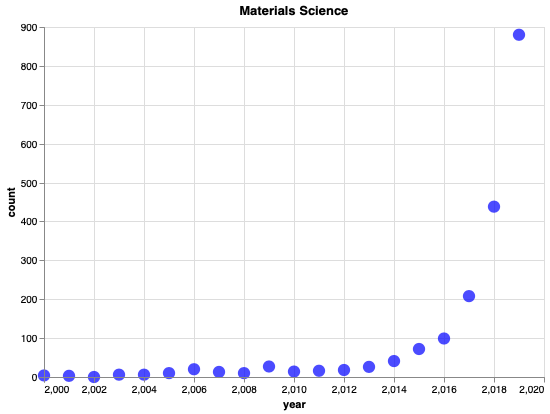

In [17]:
charts[0]

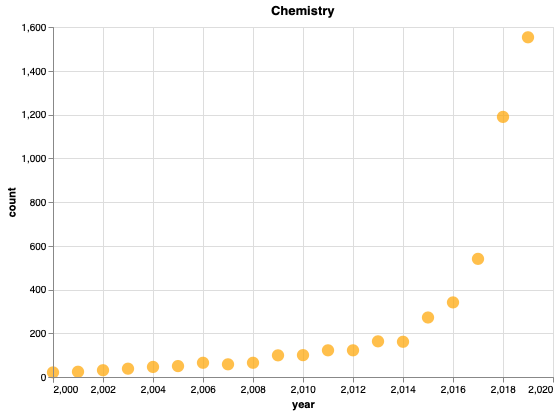

In [18]:
charts[1]

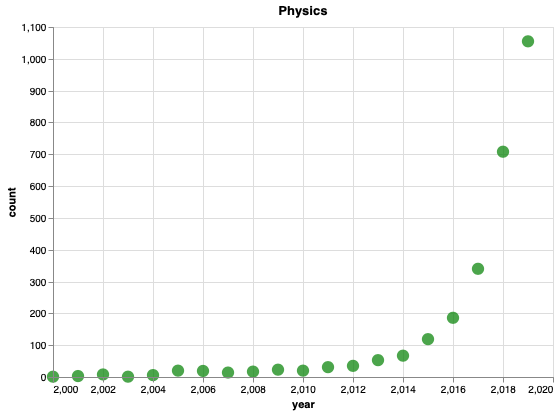

In [19]:
charts[2]